In [1]:
import cv2 as cv
from IPython.display import Image,display
import os
import matplotlib.pyplot as plt
import numpy as np
import skimage.restoration as sk
%matplotlib inline

In [2]:
rates = ["0", "0.01", "0.001","Default"]
images = os.listdir("Data/Input")
images.sort()

In [3]:
def read(folder,suffix,filename):
#     print(os.path.join("Data/"+folder+'/'+suffix, filename))
    return cv.imread(os.path.join("Data/"+folder+'/'+suffix, filename))
          
def write(folder,suffix,filename,image):
    return cv.imwrite(os.path.join("Data/"+folder+'/'+suffix, filename), image)

In [134]:
bgModel = cv.createBackgroundSubtractorMOG2()
for rate in rates:
    if rate is "Default":
        alpha = -1
    else:
        alpha = float(rate) 
    for image in images:
        img = read("Input",'',image)
        fgMask = bgModel.apply(img, learningRate = alpha)
        write("OutputMOG2",rate,image,fgMask)
    


In [135]:
bgModel = cv.bgsegm.createBackgroundSubtractorMOG()
for rate in rates:
    if rate is "Default":
        alpha = -1
    else:
        alpha = float(rate) 
    for image in images:
        img = read("Input",'',image)
        fgMask = bgModel.apply(img, learningRate = alpha)
        write("OutputMOG",rate,image,fgMask)
    


In [91]:
bgModel = cv.bgsegm.createBackgroundSubtractorGMG()
for rate in rates:
    if rate is "Default":
        alpha = -1
    else:
        alpha = float(rate) 
    for image in images:
        img = read("Input",'',image)
        fgMask = bgModel.apply(img, learningRate = alpha)
        write("OutputGMG",rate,image,fgMask)
    


In [119]:
# failed attempt
models = ['MOG2']
rates = ['0.01']
modelList = []
for model in models:
    rateList = []
    for rate in rates:
        if rate is "Default":
            alpha = -1
        else:
            alpha = float(rate) 
        imageList = []
        for image in images:
            img = read("Output"+model, rate, image)
            sigma=sk.estimate_sigma(img, multichannel=True)
            imageList.append(sigma)
        rateList.append(imageList)
    modelList.append(rateList)
            
            

## MOG Results

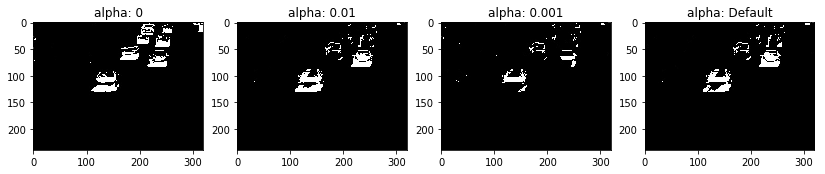

In [136]:
fig=plt.figure(figsize=(14, 10))
columns = 4
rows = 1
for i in range(1, columns*rows +1):
    img = read("OutputMOG", rates[i-1], 'in000762.jpg')
    ax = fig.add_subplot(rows, columns, i)
    ax.set_title("alpha: "+rates[i-1])
    plt.imshow(img)
plt.show()

## MOG2 Results

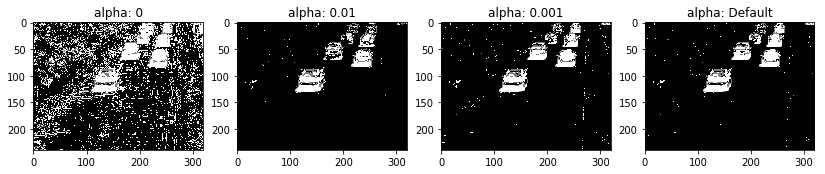

In [137]:
fig=plt.figure(figsize=(14, 10))
columns = 4
rows = 1
for i in range(1, columns*rows +1):
    img = read("OutputMOG2", rates[i-1], 'in000762.jpg')
    ax = fig.add_subplot(rows, columns, i)
    ax.set_title("alpha: "+rates[i-1])
    plt.imshow(img)
plt.show()

## GMG Results

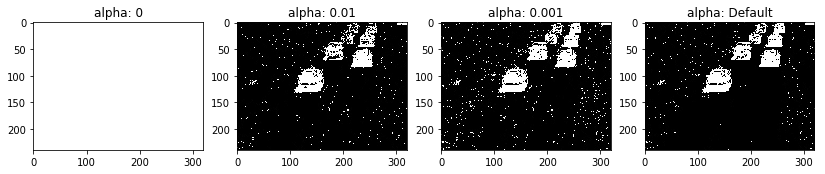

In [138]:
fig=plt.figure(figsize=(14, 10))
columns = 4
rows = 1
for i in range(1, columns*rows +1):
    img = read("OutputGMG", rates[i-1], 'in000762.jpg')
    ax = fig.add_subplot(rows, columns, i)
    ax.set_title("alpha: "+rates[i-1])
    plt.imshow(img)
plt.show()

### All three methods have shown goood results in default learning rates
### MOG2 seems to show have higher resistance to noise

## Incase of changes in illumination

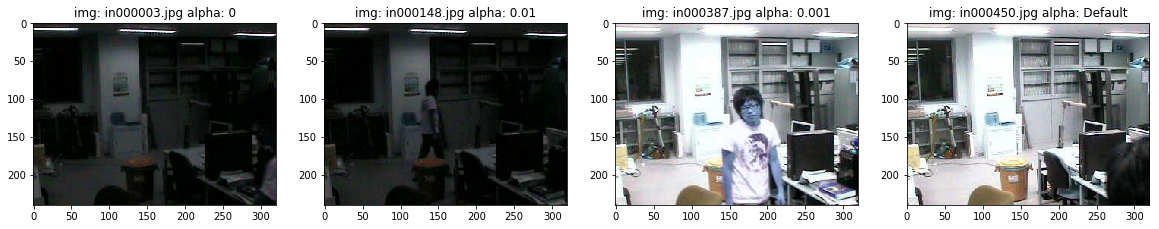

In [166]:
fig=plt.figure(figsize=(20, 15))
ax = []
image_list = ['in000003.jpg','in000148.jpg', 'in000387.jpg', 'in000450.jpg']
rows = 1
columns = len(image_list)
# for j in range(0, rows):
for i in range(1, rows*columns+1):
    img = read("Illumination", '', image_list[(i-1)%columns])
    ax.append(fig.add_subplot(rows, columns, i))
    ax[-1].set_title("img: " + image_list[(i-1)%columns] + " alpha: "+rates[(i-1)%4])
    plt.imshow(img)
plt.show()

## MOG2

In [141]:
images = os.listdir("Data/Illumination")
images.sort()
bgModel = cv.createBackgroundSubtractorMOG2()
for rate in rates:
    if rate is "Default":
        alpha = -1
    else:
        alpha = float(rate) 
    for image in images:
        img = read("Illumination",'',image)
        fgMask = bgModel.apply(img, learningRate = alpha)
        write("OutIllMOG2",rate,image,fgMask)
    


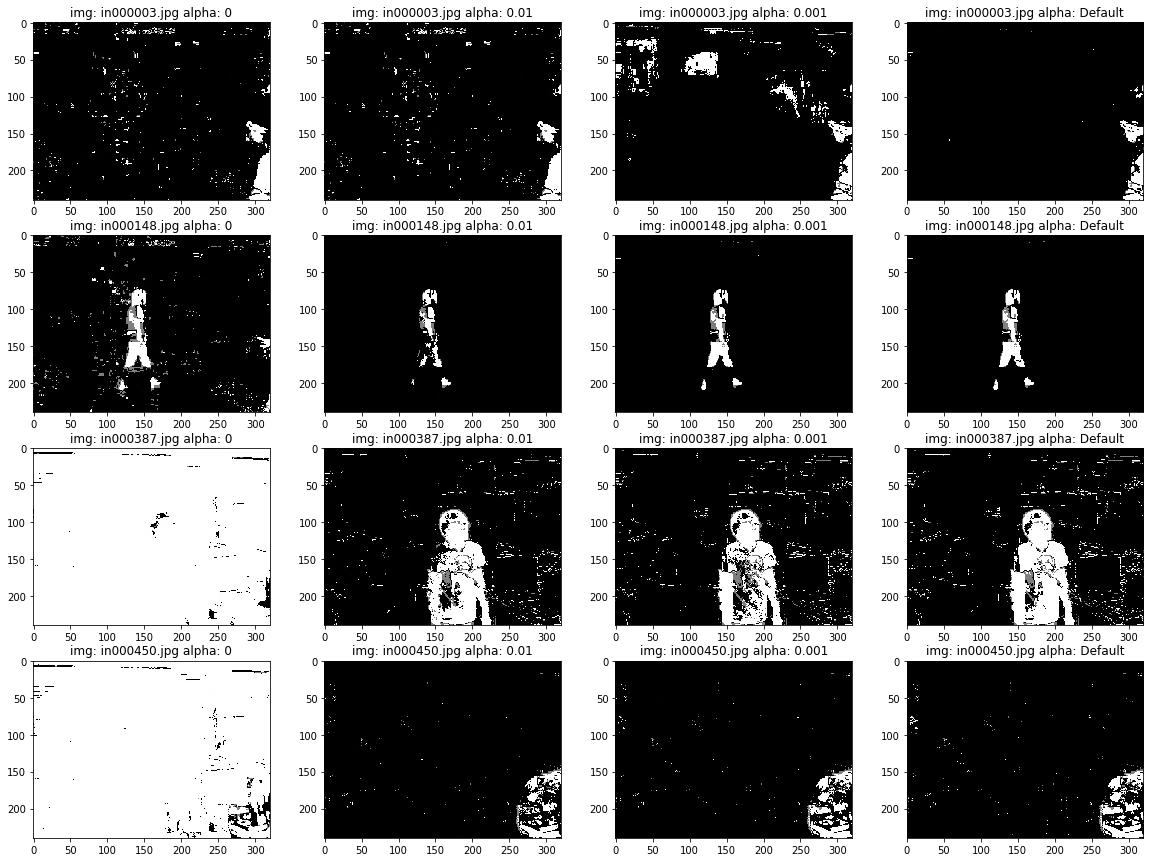

In [175]:
fig=plt.figure(figsize=(20, 15))
ax = []
image_list = ['in000003.jpg','in000148.jpg', 'in000387.jpg', 'in000450.jpg']
rows = len(image_list)
columns = len(rates)
# for j in range(0, rows):
for i in range(1, rows*columns+1):
    img = read("OutIllMOG2", rates[(i-1)%columns], image_list[int((i-1)/rows)])
    ax.append(fig.add_subplot(rows, columns, i))
    ax[-1].set_title("img: " + image_list[int((i-1)/rows)] + " alpha: "+rates[(i-1)%4])
    plt.imshow(img)
plt.show()

## MOG

In [168]:
images = os.listdir("Data/Illumination")
images.sort()
bgModel = cv.bgsegm.createBackgroundSubtractorMOG()
for rate in rates:
    if rate is "Default":
        alpha = -1
    else:
        alpha = float(rate) 
    for image in images:
        img = read("Illumination",'',image)
        fgMask = bgModel.apply(img, learningRate = alpha)
        write("OutIllMOG",rate,image,fgMask)

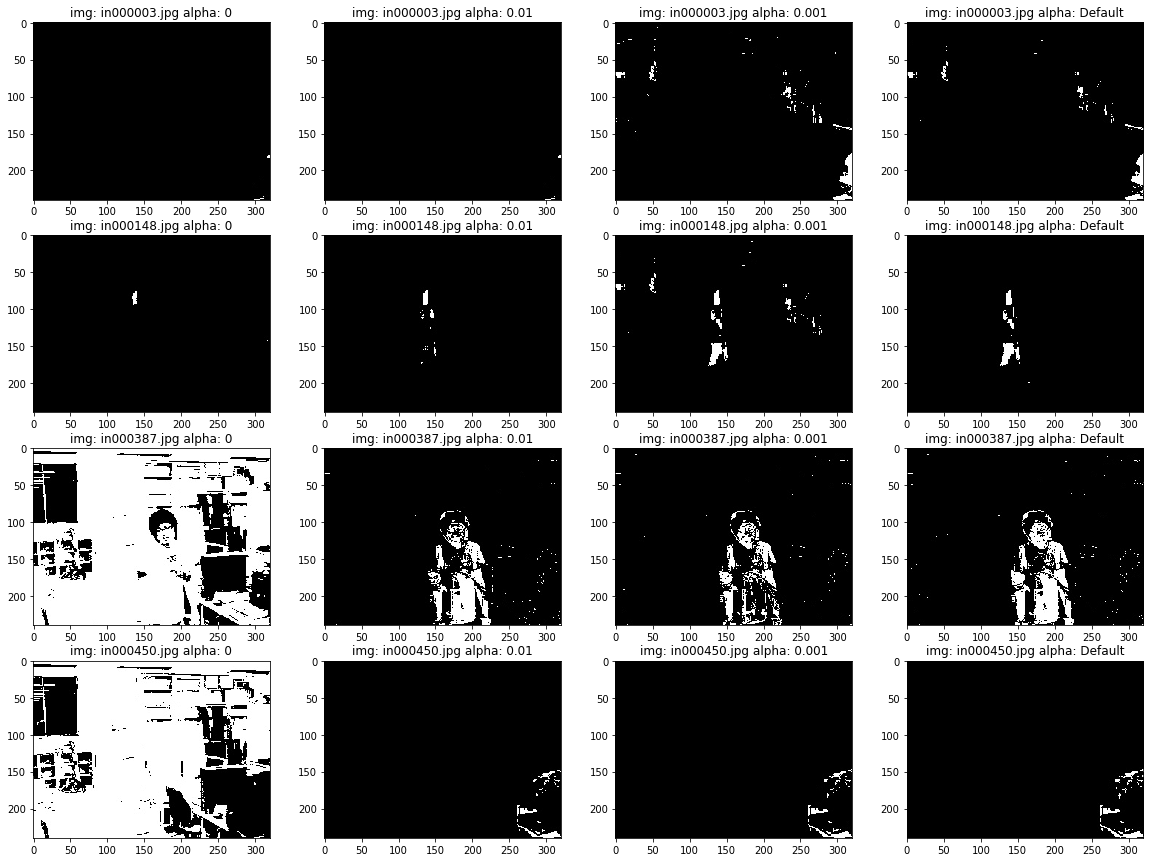

In [176]:
fig=plt.figure(figsize=(20, 15))
ax = []
image_list = ['in000003.jpg','in000148.jpg', 'in000387.jpg', 'in000450.jpg']
rows = len(image_list)
columns = len(rates)
# for j in range(0, rows):
for i in range(1, rows*columns+1):
    img = read("OutIllMOG", rates[(i-1)%columns], image_list[int((i-1)/rows)])
    ax.append(fig.add_subplot(rows, columns, i))
    ax[-1].set_title("img: " + image_list[int((i-1)/rows)] + " alpha: "+rates[(i-1)%4])
    plt.imshow(img)
plt.show()

## GMG

In [171]:
images = os.listdir("Data/Illumination")
images.sort()
bgModel = cv.bgsegm.createBackgroundSubtractorGMG()
for rate in rates:
    if rate is "Default":
        alpha = -1
    else:
        alpha = float(rate) 
    for image in images:
        img = read("Illumination",'',image)
        fgMask = bgModel.apply(img, learningRate = alpha)
        write("OutIllGMG",rate,image,fgMask)

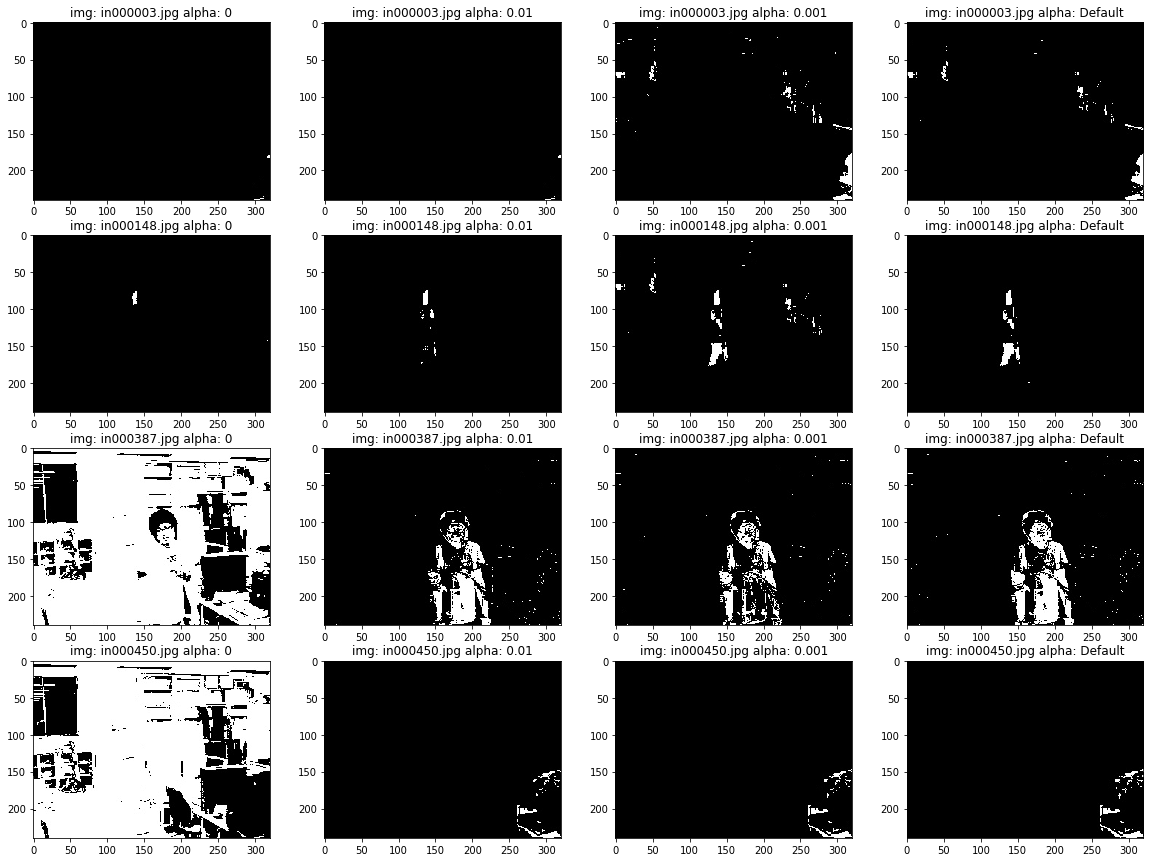

In [177]:
fig=plt.figure(figsize=(20, 15))
ax = []
image_list = ['in000003.jpg','in000148.jpg', 'in000387.jpg', 'in000450.jpg']
rows = len(image_list)
columns = len(rates)
# for j in range(0, rows):
for i in range(1, rows*columns+1):
    img = read("OutIllMOG", rates[(i-1)%columns], image_list[int((i-1)/rows)])
    ax.append(fig.add_subplot(rows, columns, i))
    ax[-1].set_title("img: " + image_list[int((i-1)/rows)] + " alpha: "+rates[(i-1)%4])
    plt.imshow(img)
plt.show()

### In case of variable illumination we observe MOG2 and GMG to be highly adaptive

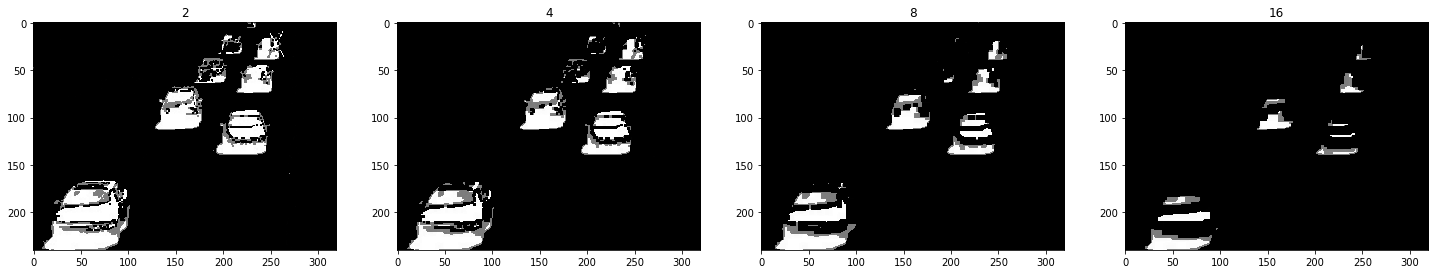

In [230]:
img = read('OutputMOG2', 'Default', 'in000797.jpg')
kernel = np.ones((2,2), np.uint8)
img0 = cv.erode(img, kernel, iterations=1)
img1 = cv.erode(img, kernel, iterations=2)
img2 = cv.erode(img, kernel, iterations=4)
img3 = cv.erode(img, kernel, iterations=8)
imgs = [img0, img1, img2, img3]
fig = plt.figure(figsize = (25,25))
rows = 1
cols = 4
ax= []
for i in range(1, rows*cols+1):
    ax.append(fig.add_subplot(rows, cols, i))
    ax[-1].set_title(str(2**i))
    plt.imshow(imgs[i-1])


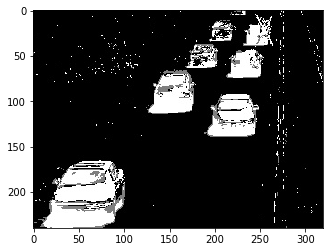

In [193]:
img = read('OutputMOG2', 'Default', 'in000797.jpg')
plt.imshow(img)

1
2
4
8


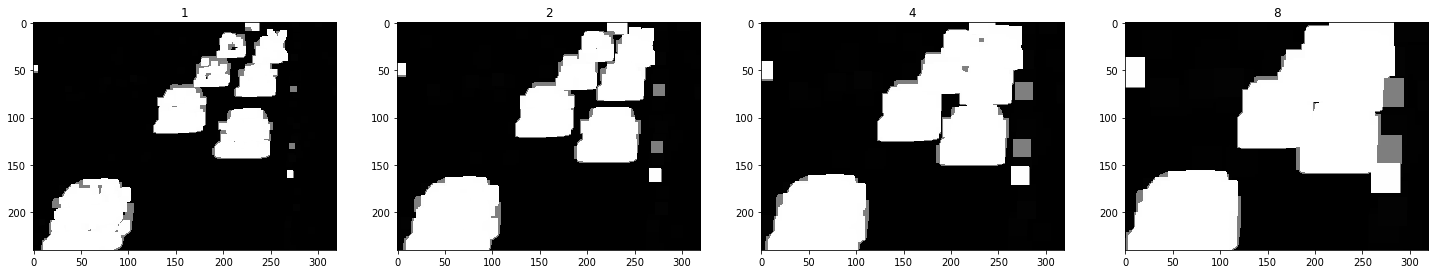

In [217]:
kernel = np.ones((4,4), np.uint8)
for i in range(len(imgs)):
    imgs[i] = cv.dilate(imgs[0],kernel,iterations = 2**(i))
fig = plt.figure(figsize = (25,25))
rows = 1
cols = 4
ax= []
for i in range(1, rows*cols+1):
    ax.append(fig.add_subplot(rows, cols, i))
    ax[-1].set_title(str(2**(i-1)))
    plt.imshow(imgs[i-1])

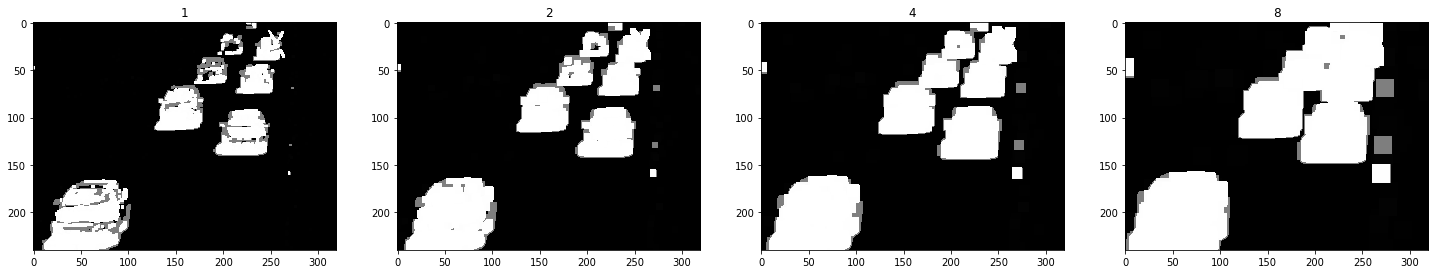

In [221]:
kernel = np.ones((3,3), np.uint8)
for i in range(len(imgs)):
    imgs[i] = cv.dilate(imgs[0],kernel,iterations = 2**(i))
fig = plt.figure(figsize = (25,25))
rows = 1
cols = 4
ax= []
for i in range(1, rows*cols+1):
    ax.append(fig.add_subplot(rows, cols, i))
    ax[-1].set_title(str(2**(i-1)))
    plt.imshow(imgs[i-1])

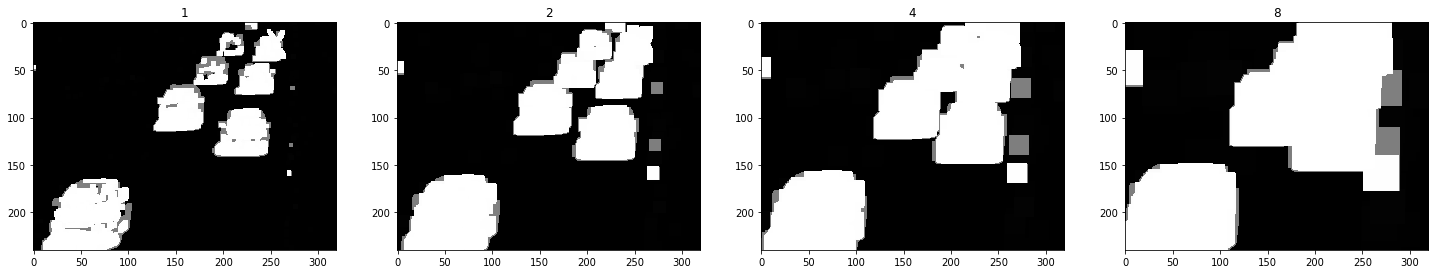

In [225]:
kernel = np.ones((5,5), np.uint8)
for i in range(len(imgs)):
    imgs[i] = cv.dilate(imgs[0],kernel,iterations = 2**(i))
fig = plt.figure(figsize = (25,25))
rows = 1
cols = 4
ax= []
for i in range(1, rows*cols+1):
    ax.append(fig.add_subplot(rows, cols, i))
    ax[-1].set_title(str(2**(i-1)))
    plt.imshow(imgs[i-1])

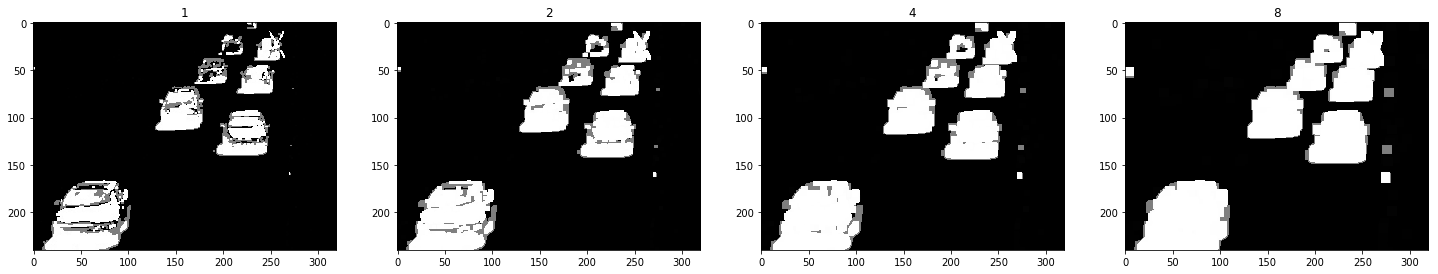

In [231]:
kernel = np.ones((2,2), np.uint8)
for i in range(len(imgs)):
    imgs[i] = cv.dilate(imgs[0],kernel,iterations = 2**(i))
fig = plt.figure(figsize = (25,25))
rows = 1
cols = 4
ax= []
for i in range(1, rows*cols+1):
    ax.append(fig.add_subplot(rows, cols, i))
    ax[-1].set_title(str(2**(i-1)))
    plt.imshow(imgs[i-1])

In [239]:
for image in images:
    img = read("OutputMOG2", "Default", image)
    eroKernel = np.ones((2,2), np.uint8)
    img = cv.erode(img, eroKernel, 1)
    dilKernel = np.ones((4,4), np.uint8)
    img = cv.dilate(img, dilKernel, 1)
#     kernel = np.ones((2,2), np.uint8)
#     img = cv.morphologyEx(img, cv.MORPH_OPEN, kernel)
    write("EnD", '', image, img)
    

In [5]:
img = read('OutputMOG2', 'Default', 'in000797.jpg')
unique, counts = np.unique(img, return_counts=True)
values = dict(zip(unique, counts))

In [6]:
plt.hist2d()

{0: 177006,
 1: 8244,
 2: 5295,
 3: 2574,
 4: 1029,
 5: 345,
 6: 135,
 7: 42,
 8: 3,
 121: 27,
 122: 33,
 123: 180,
 124: 510,
 125: 924,
 126: 1323,
 127: 2124,
 128: 1521,
 129: 897,
 130: 495,
 131: 195,
 132: 54,
 133: 18,
 134: 3,
 135: 3,
 247: 3,
 248: 9,
 249: 33,
 250: 132,
 251: 453,
 252: 1059,
 253: 2274,
 254: 3579,
 255: 19878}

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

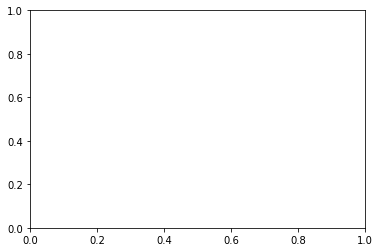

In [9]:
plt.hist2d(values,counts)

(array([194673.,      0.,      0.,      0.,   5121.,   3186.,      0.,
             0.,      0.,  27420.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

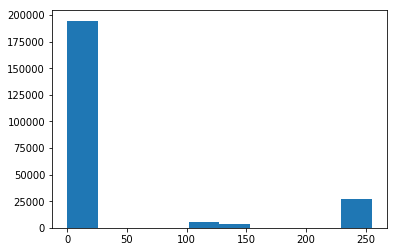

In [13]:
plt.hist(img.flatten())

(array([182616.,   6522.,   3360.,   2871.,   3096.,   4272.,   4680.,
          4488.,   4803.,  13692.]),
 array([  0. ,  25.3,  50.6,  75.9, 101.2, 126.5, 151.8, 177.1, 202.4,
        227.7, 253. ]),
 <a list of 10 Patch objects>)

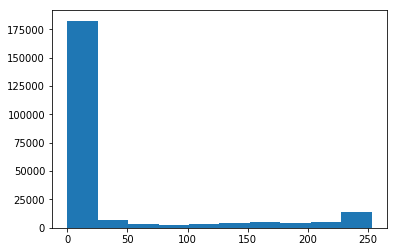

In [24]:
img1 = cv.GaussianBlur(img, (11,11), 0)
plt.hist(img1.flatten())

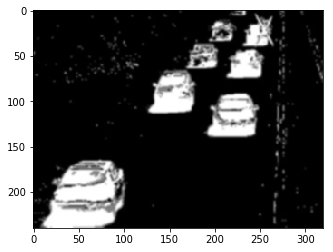

In [20]:
plt.imshow(img1)

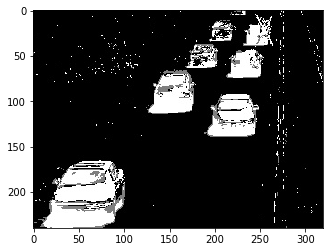

In [21]:
plt.imshow(img)